In [1]:
! ~/env/bin/pip install pyflux

    100% |████████████████████████████████| 1.3MB 9.8MB/s eta 0:00:01
    100% |████████████████████████████████| 3.2MB 9.9MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 16.5MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 26.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyflux ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
  Running setup.py bdist_wheel for algopy ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/58/08/1a/722554a81c38724475372972cd0e50081ec63c7a58e3c48fa8
Successfully built pyflux algopy
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
! ~/env/bin/pip install statsmodels

In [ ]:
! ~/env/bin/pip install pystan

In [20]:
! ~/env/bin/pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/83/a1/a39be1675a62597e4c0d4fdaeb65b14752b8aa8afc92e90edd91614353ab/fbprophet-0.3.post2.tar.gz
  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f5/21/b3/127d7d3dd12f8311da7d5af1944976f53e121ce88899697c6f
Successfully built fbprophet
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

--2018-10-10 07:39:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx  100%[===================>]  22.62M  23.6MB/s    in 1.0s    

2018-10-10 07:39:36 (23.6 MB/s) - ‘Online Retail.xlsx’ saved [23715344/23715344]



In [553]:
! mkdir data
! mv Online Retail.xlsx data/

mkdir: cannot create directory ‘data’: File exists


In [616]:
import pyflux as pf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from  fbprophet import Prophet
%matplotlib inline

In [261]:
%%time
d = pd.read_excel("data/Online Retail.xlsx")

CPU times: user 47 s, sys: 105 ms, total: 47.1 s
Wall time: 47.1 s


In [262]:
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [263]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [264]:
d.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [265]:
d.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [266]:
d["Country"].unique()

array([u'United Kingdom', u'France', u'Australia', u'Netherlands',
       u'Germany', u'Norway', u'EIRE', u'Switzerland', u'Spain',
       u'Poland', u'Portugal', u'Italy', u'Belgium', u'Lithuania',
       u'Japan', u'Iceland', u'Channel Islands', u'Denmark', u'Cyprus',
       u'Sweden', u'Austria', u'Israel', u'Finland', u'Bahrain',
       u'Greece', u'Hong Kong', u'Singapore', u'Lebanon',
       u'United Arab Emirates', u'Saudi Arabia', u'Czech Republic',
       u'Canada', u'Unspecified', u'Brazil', u'USA',
       u'European Community', u'Malta', u'RSA'], dtype=object)

# Preprocessing

In [267]:
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1. fix outliers and missing data
2. Calculate revenue 

In [268]:
invoices_to_drop = d[
    (d["Quantity"] <= 0 ) | 
    (d["UnitPrice"] <= 0 )
                    ]["InvoiceNo"].unique()

In [269]:
len(invoices_to_drop)

5993

drop

In [270]:
df = d[~d["InvoiceNo"].isin(invoices_to_drop)]

In [271]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,527382.000000,527382.000000,397327.000000
mean,10.553356,3.891814,15296.361949
std,155.918191,35.874745,1712.531474
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16800.000000
max,80995.000000,13541.330000,18287.000000


normalize data

In [272]:
from sklearn.preprocessing import MinMaxScaler

In [273]:
scaler = MinMaxScaler(feature_range=[0,1])

In [274]:
norm_df = pd.DataFrame(scaler.fit_transform(df[["Quantity", "UnitPrice"]]), 
                       columns=["Quantity", "UnitPrice"])

In [283]:
norm_df["InvoiceNo"] = df["InvoiceNo"].values
norm_df.index = df.index

In [284]:
norm_df.head()

,Quantity,UnitPrice,InvoiceNo
0,0.000062,0.000188,536365
1,0.000062,0.000250,536365
2,0.000086,0.000203,536365
3,0.000062,0.000250,536365
4,0.000062,0.000250,536365


In [285]:
norm_df.shape, df.shape

((527382, 3), (527382, 8))

In [278]:
mean_quantity = norm_df["Quantity"].mean()
std_quantity = norm_df["Quantity"].std()

In [279]:
mean_quantity, std_quantity

(0.00011795140394834332, 0.0019250585299689991)

In [280]:
norm_df.shape

(527382, 3)

In [286]:
outlier_indexes = norm_df[(norm_df["Quantity"] >= mean_quantity + 3*std_quantity)].index

In [288]:
len(outlier_indexes)

521

In [289]:
outlier_df = df[df.index.isin(outlier_indexes)]

In [290]:
outlier_df.shape

(521, 8)

In [291]:
df = df[~(df.index.isin(outlier_indexes))]

In [292]:
norm_df = norm_df[~(norm_df.index.isin(outlier_indexes))]

In [293]:
norm_df.shape, df.shape

((526861, 3), (526861, 8))

In [295]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,526861.000000,526861.000000,396813.000000
mean,9.444948,3.894496,15295.704778
std,21.941798,35.892354,1712.246627
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16800.000000
max,478.000000,13541.330000,18287.000000


In [296]:
mean_price = norm_df["UnitPrice"].mean()
std_price = norm_df["UnitPrice"].std()

In [297]:
outlier_indexes = norm_df[(norm_df["UnitPrice"] >= mean_price + 3*std_price)].index

In [298]:
len(outlier_indexes)

772

In [299]:
df.shape, norm_df.shape

((526861, 8), (526861, 3))

In [300]:
df = df[~(df.index.isin(outlier_indexes))]

In [301]:
norm_df = norm_df[~(norm_df.index.isin(outlier_indexes))]

In [302]:
df.shape, norm_df.shape

((526089, 8), (526089, 3))

In [303]:
df["Country"].value_counts()

United Kingdom          481439
Germany                   9013
France                    8387
EIRE                      7827
Spain                     2477
Netherlands               2346
Belgium                   2031
Switzerland               1944
Portugal                  1495
Australia                 1162
Norway                    1033
Italy                      757
Channel Islands            747
Finland                    684
Cyprus                     607
Unspecified                446
Sweden                     434
Austria                    398
Denmark                    380
Poland                     330
Japan                      305
Israel                     294
Hong Kong                  280
Singapore                  214
Iceland                    182
USA                        179
Canada                     149
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
Lebanon                     45
Lithuani

In [304]:
filtered_df = df[df["Country"] == "United Kingdom"]

In [305]:
filtered_df.shape

(481439, 8)

In [307]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [308]:
filtered_df["Total_value_paid"] = filtered_df["Quantity"] * filtered_df["UnitPrice"]

In [309]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_value_paid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [310]:
filtered_df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [311]:
filtered_df["InvoiceDate"].max()

Timestamp('2011-12-09 12:49:00')

In [314]:
len(filtered_df["InvoiceDate"].dt.date.unique())

305

In [317]:
dates = pd.date_range(start='2010-12-01', end='2011-12-09', freq='D')

In [318]:
dates.shape

(374,)

In [320]:
staging_df = pd.DataFrame(dates, columns=['Date'])

In [321]:
staging_df.head()

,Date
0,2010-12-01
1,2010-12-02
2,2010-12-03
3,2010-12-04
4,2010-12-05


Left join with the stagingdf containing all dates with that filtered df that has missing dates.

In [ ]:
# daily_revenue_df = filtered_df.groupby(filtered_df["InvoiceDate"].dt.date, 
#                                        as_index=False)['Total_value_paid'].sum()

In [331]:
daily_revenue_df = filtered_df.groupby(filtered_df["InvoiceDate"].dt.date, 
                                       as_index=True)['Total_value_paid'].sum().to_frame()

In [ ]:
# daily_revenue_df = daily_revenue_df.reset_index()

In [333]:
daily_revenue_df.reset_index(inplace=True)

In [334]:
daily_revenue_df.head()

,InvoiceDate,Total_value_paid
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-05,25738.00
4,2010-12-06,48766.52


In [337]:
staging_df.head()

,Date
0,2010-12-01
1,2010-12-02
2,2010-12-03
3,2010-12-04
4,2010-12-05


In [338]:
daily_revenue_df["InvoiceDate"] = pd.to_datetime(daily_revenue_df["InvoiceDate"])

In [339]:
daily_revenue_df.head()

,InvoiceDate,Total_value_paid
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-05,25738.00
4,2010-12-06,48766.52


In [352]:
full_df = staging_df.merge(daily_revenue_df, left_on='Date', right_on='InvoiceDate', how='left')

In [353]:
full_df.head()

,Date,InvoiceDate,Total_value_paid
0,2010-12-01,2010-12-01,51704.62
1,2010-12-02,2010-12-02,44095.93
2,2010-12-03,2010-12-03,39547.21
3,2010-12-04,NaT,NaN
4,2010-12-05,2010-12-05,25738.00


In [354]:
full_df.isnull().sum()

Date                 0
InvoiceDate         69
Total_value_paid    69
dtype: int64

In [355]:
full_df["Total_value_paid"].fillna(full_df["Total_value_paid"].mean()).head()

0    51704.620000
1    44095.930000
2    39547.210000
3    26043.311292
4    25738.000000
Name: Total_value_paid, dtype: float64

In [356]:
full_df["Total_value_paid"] = full_df["Total_value_paid"].fillna(method="ffill")

In [357]:
full_df.head() 

,Date,InvoiceDate,Total_value_paid
0,2010-12-01,2010-12-01,51704.62
1,2010-12-02,2010-12-02,44095.93
2,2010-12-03,2010-12-03,39547.21
3,2010-12-04,NaT,39547.21
4,2010-12-05,2010-12-05,25738.00


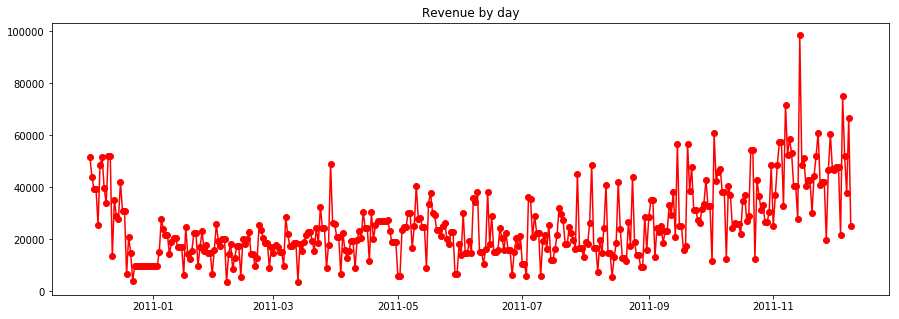

In [381]:
plt.figure(figsize=[15,5])
plt.plot(full_df["Date"], full_df["Total_value_paid"], 'o-r')
plt.title("Revenue by day");

In [373]:
full_df.head()

,Date,InvoiceDate,Total_value_paid
0,2010-12-01,2010-12-01,51704.62
1,2010-12-02,2010-12-02,44095.93
2,2010-12-03,2010-12-03,39547.21
3,2010-12-04,NaT,39547.21
4,2010-12-05,2010-12-05,25738.00


In [375]:
ts_df = full_df[["Date", "Total_value_paid"]]

In [376]:
ts_df.head()

,Date,Total_value_paid
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-04,39547.21
4,2010-12-05,25738.00


In [377]:
kpi_to_forecast = "Total_value_paid"

Dividind data into data for training and data for evaluation

In [385]:
working_data = ts_df[:-30] # everything except the last 30 days
df_test = ts_df[-30:] # ts_df.trail(30)

In [389]:
working_data.Date.max(), df_test.Date.min()

(Timestamp('2011-11-09 00:00:00'), Timestamp('2011-11-10 00:00:00'))

In [520]:
working_data.shape, df_test.shape

((344, 1), (30, 2))

# 2. Test Stationarity

Hypothesis testing:
 1. Null hyp: TS is not stationary
 2. Alternative hyp: TS is stationary
 
DF test return values that we analyze 
    - if test statistics > crit.value -> we cannot reject null hyp
    - if test statistics < crit.value -> we reject null hyp

In [393]:
# import function for hypothesis testing - stationarity test
from statsmodels.tsa.stattools import adfuller

In [394]:
df_stationarity_test = adfuller(working_data[kpi_to_forecast])

In [395]:
df_stationarity_test

(-1.1937687366858742,
 0.6762704834772875,
 14,
 329,
 {'1%': -3.4503836022181056,
  '10%': -2.571471939191249,
  '5%': -2.8703653471616826},
 6845.297925624975)

In [398]:
-1.193 > -3.45 # True -> we cannot reject null hypot

True

In [400]:
print("Result of the Dickey-Fuller test:")
dfoutput = pd.Series(df_stationarity_test[0:4], index = ["Test statistic", "p_value", "lags_used", "nobs"])
dfoutput

Result of the Dickey-Fuller test:


Test statistic     -1.193769
p_value             0.676270
lags_used          14.000000
nobs              329.000000
dtype: float64

In [403]:
crit_values = df_stationarity_test[4]

In [404]:
print("The critical value for a given test is:")
crit_values['1%']

The critical value for a given test is:


-3.4503836022181056

Since the test statistic is higher than the critical value -> Time series is not stationary

    - In order to make a ts stationary, we going to perform differencing

In [405]:
working_data.head()

,Date,Total_value_paid
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-04,39547.21
4,2010-12-05,25738.00


In [406]:
working_data.index = working_data["Date"]
working_data.drop("Date", axis=1, inplace=True)

In [407]:
working_data.head()

,Total_value_paid
Date,
2010-12-01,51704.62
2010-12-02,44095.93
2010-12-03,39547.21
2010-12-04,39547.21
2010-12-05,25738.00


In [409]:
working_data.shift().head()

,Total_value_paid
Date,
2010-12-01,NaN
2010-12-02,51704.62
2010-12-03,44095.93
2010-12-04,39547.21
2010-12-05,39547.21


In [410]:
# difference in order to eliminate trend and stationarity
data_diff = working_data - working_data.shift()

In [411]:
data_diff.head()

,Total_value_paid
Date,
2010-12-01,NaN
2010-12-02,-7608.69
2010-12-03,-4548.72
2010-12-04,0.00
2010-12-05,-13809.21


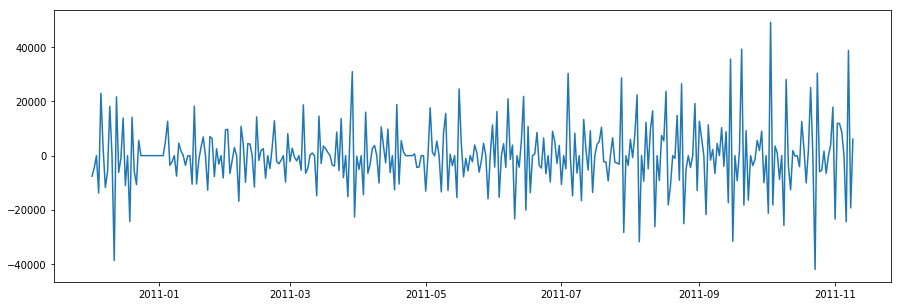

In [414]:
plt.figure(figsize=[15,5])
plt.plot(data_diff.index, data_diff[kpi_to_forecast]);

In [416]:
data_diff.dropna(inplace=True)

In [417]:
df_stationarity_test = adfuller(data_diff[kpi_to_forecast])
df_stationarity_test

(-6.505158426817002,
 1.135990606207911e-08,
 13,
 329,
 {'1%': -3.4503836022181056,
  '10%': -2.571471939191249,
  '5%': -2.8703653471616826},
 6822.101560576389)

# ARIMA (p,d,q)
p - number of AR terms (check the PACF function)

d - order of difference (determing the d=1 will do the job)

q - number of MA terms (check the ACF function)

detect p and q via Box-Jenkins methodology

In [421]:
# pf.ARIMA()
# p?
# q?

Extract PACF and ACF functions on order to determine p and q

In [425]:
from statsmodels.tsa.stattools import acf, pacf

- Extract partion autocorrelation from data_diff

In [426]:
lag_pacf = pacf(data_diff[kpi_to_forecast])

In [427]:
lag_pacf

array([ 1.        , -0.44408223, -0.24157082, -0.2192407 , -0.19083839,
       -0.15051535, -0.37514063,  0.16689471, -0.01914364, -0.0042774 ,
        0.0270023 ,  0.00563362, -0.15420993, -0.14881267,  0.10816838,
        0.03413628,  0.09574821, -0.02539661,  0.03238869, -0.04348532,
       -0.09341881, -0.0328174 ,  0.09837381,  0.09801435,  0.08553309,
       -0.04787012, -0.01307356, -0.16842001, -0.0015942 , -0.03714895,
        0.04364561,  0.13358469,  0.09110629,  0.02452736, -0.18474341,
        0.03264149,  0.01366553,  0.05398921,  0.02647198, -0.06490487,
       -0.01339355])

In [442]:
lower_conf = -1.96 / np.sqrt(len(data_diff[kpi_to_forecast].values))
upper_conf = 1.96 / np.sqrt(len(data_diff[kpi_to_forecast].values))

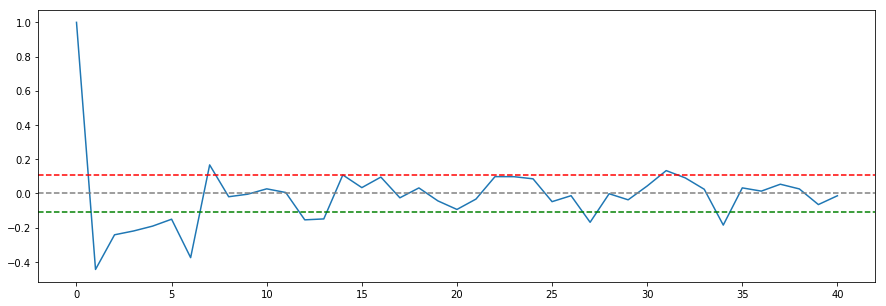

In [449]:
plt.figure(figsize=[15,5])
plt.plot(range(0, len(lag_pacf)), lag_pacf)
# plt.xticks(range(0, len(lag_pacf)), 1)
plt.axhline(y=0, linestyle='--', color='gray');
plt.axhline(y=lower_conf, linestyle='--', color='green');
plt.axhline(y=upper_conf, linestyle='--', color='red');

In [457]:
ar = 7

In [450]:
lag_acf = acf(data_diff[kpi_to_forecast])

In [451]:
lag_acf

array([ 1.        , -0.44278753,  0.00325904, -0.05973651, -0.00468215,
        0.0082342 , -0.16467932,  0.4025815 , -0.25077408,  0.05332163,
       -0.02565895, -0.00261069, -0.08274788, -0.02796146,  0.30200318,
       -0.20618458,  0.08013137, -0.10709691,  0.06393368, -0.09997086,
        0.00390945,  0.18688785, -0.08231495,  0.04860255, -0.08467961,
       -0.02235686, -0.03456438, -0.0341307 ,  0.21347498, -0.11123078,
        0.05929193, -0.03540766, -0.02778832, -0.0526955 , -0.08070192,
        0.27470655, -0.11316355,  0.0390322 , -0.07095971, -0.05828355,
        0.02498186])

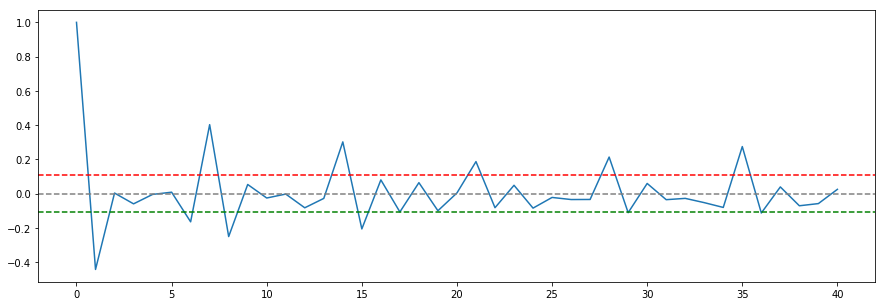

In [452]:
plt.figure(figsize=[15,5])
plt.plot(range(0, len(lag_acf)), lag_acf)
# plt.xticks(range(0, len(lag_pacf)), 1)
plt.axhline(y=0, linestyle='--', color='gray');
plt.axhline(y=lower_conf, linestyle='--', color='green');
plt.axhline(y=upper_conf, linestyle='--', color='red');

In [460]:
ma = 7 # or 14

In [467]:
model = pf.ARIMA(data = working_data[kpi_to_forecast].values, ar=ar, ma=ma, integ=1)

In [469]:
x = model.fit()

In [472]:
x.summary()

Normal ARIMA(7,1,7)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Series                  Method: MLE                                       
Start Date: 7                                           Log Likelihood: -3505.0668                        
End Date: 343                                           AIC: 7042.1336                                    
Number of observations: 336                             BIC: 7103.2074                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 20.2555    446.9219   0.0453   0.9639   (-855.7115 | 896.2225)   
AR(1)                                

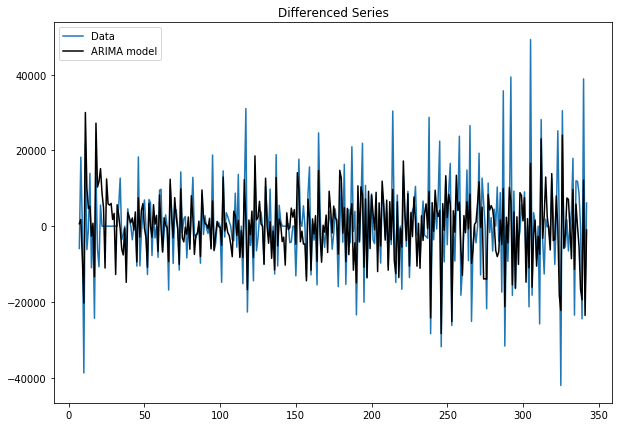

In [473]:
model.plot_fit()

In [525]:
%%time
predicted_df = model.predict(30, intervals=True)

CPU times: user 16 s, sys: 19.7 ms, total: 16 s
Wall time: 16 s


In [526]:
dates2 = pd.date_range(start='2011-11-10', end='2011-12-09', freq='D')

In [527]:
predicted_df.index = dates2

In [528]:
predicted_df.head()

,Differenced Series,1% Prediction Interval,5% Prediction Interval,95% Prediction Interval,99% Prediction Interval
2011-11-10,-5108.510825,-24174.984173,-18592.906094,8377.462105,14147.703386
2011-11-11,4932.146063,-17838.828241,-11387.548676,21240.587498,28321.105729
2011-11-12,-10843.969523,-34272.499328,-27286.968563,5336.847956,12090.626554
2011-11-13,-4834.249211,-28145.428814,-21042.185114,11487.334895,18442.711273
2011-11-14,12584.825619,-10578.185484,-3772.204463,28852.475188,36177.005611


In [530]:
predicted_df = predicted_df[["Differenced Series"]]

In [531]:
staging_df = working_data.tail(1)

In [532]:
staging_df

,Total_value_paid
Date,
2011-11-09,58651.92


In [533]:
predicted_df.columns = ["Total_value_paid"]

In [534]:
predicted_df.head(2)

,Total_value_paid
2011-11-10,-5108.510825
2011-11-11,4932.146063


In [535]:
predicted_df = staging_df.append(predicted_df).cumsum()

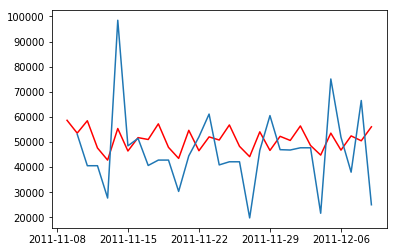

In [536]:
plt.plot(predicted_df.index, predicted_df[kpi_to_forecast], 'r')
plt.plot(df_test["Date"], df_test[kpi_to_forecast]);

In [539]:
predicted_df= predicted_df[1:]

In [541]:
predicted_df.shape, df_test.shape

((30, 1), (30, 2))

In [543]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [550]:
rmse = sqrt(mean_squared_error(df_test[kpi_to_forecast], predicted_df[kpi_to_forecast]))

In [555]:
print("RMSE : " + str(rmse))

RMSE : 15232.734763


# VAR

In [556]:
ts_df.head()

,Date,Total_value_paid
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-04,39547.21
4,2010-12-05,25738.00


In [558]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_value_paid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [565]:
daily_quantity = filtered_df.groupby(filtered_df["InvoiceDate"].dt.date)["Quantity"].sum().to_frame()
daily_quantity.reset_index(inplace=True)

In [566]:
daily_quantity.head()

,InvoiceDate,Quantity
0,2010-12-01,22931
1,2010-12-02,24470
2,2010-12-03,11804
3,2010-12-05,12940
4,2010-12-06,20076


In [567]:
daily_number_customes = filtered_df.groupby(filtered_df["InvoiceDate"].dt.date)["CustomerID"].nunique().to_frame()
daily_number_customes.reset_index(inplace=True)

In [568]:
daily_number_customes.head()

,InvoiceDate,CustomerID
0,2010-12-01,89
1,2010-12-02,95
2,2010-12-03,37
3,2010-12-05,69
4,2010-12-06,79


In [569]:
daily_quant_custom = daily_quantity.merge(daily_number_customes, on="InvoiceDate")

In [570]:
daily_quant_custom.head()

,InvoiceDate,Quantity,CustomerID
0,2010-12-01,22931,89
1,2010-12-02,24470,95
2,2010-12-03,11804,37
3,2010-12-05,12940,69
4,2010-12-06,20076,79


In [575]:
daily_quant_custom["InvoiceDate"] = pd.to_datetime(daily_quant_custom["InvoiceDate"])

In [577]:
ts_df = ts_df.merge(daily_quant_custom, left_on="Date", right_on="InvoiceDate", how="left")

In [578]:
ts_df.fillna(method="ffill", inplace=True)

In [580]:
ts_df.drop("InvoiceDate", axis=1, inplace=True)

In [581]:
ts_df.head()

,Date,Total_value_paid,Quantity,CustomerID
0,2010-12-01,51704.62,22931.0,89.0
1,2010-12-02,44095.93,24470.0,95.0
2,2010-12-03,39547.21,11804.0,37.0
3,2010-12-04,39547.21,11804.0,37.0
4,2010-12-05,25738.00,12940.0,69.0


In [582]:
corr_df = ts_df.corr()

In [585]:
corr_df

,Total_value_paid,Quantity,CustomerID
Total_value_paid,1.000000,0.940622,0.776711
Quantity,0.940622,1.000000,0.858297
CustomerID,0.776711,0.858297,1.000000


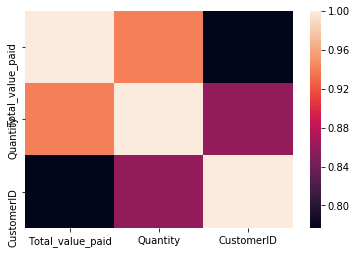

In [584]:
sb.heatmap(corr_df)

In [589]:
working_data = ts_df[:-30]
df_test = ts_df.tail(30)

In [590]:
working_data.index = working_data.Date
working_data.drop("Date", axis=1, inplace=True)

In [591]:
ts_df.shape, working_data.shape, df_test.shape

((374, 4), (344, 3), (30, 4))

In [592]:
working_data.head()

,Total_value_paid,Quantity,CustomerID
Date,,,
2010-12-01,51704.62,22931.0,89.0
2010-12-02,44095.93,24470.0,95.0
2010-12-03,39547.21,11804.0,37.0
2010-12-04,39547.21,11804.0,37.0
2010-12-05,25738.00,12940.0,69.0


In [594]:
model = pf.VAR(data=working_data, 
               target=kpi_to_forecast, 
               lags=7,
               integ=0) # for homework integrate it and set integ=1

In [595]:
x = model.fit()

In [597]:
x.summary()

VAR(7)                                                                                                    
======================================================= ==================================================
Dependent Variable: Total_value_paid,Quantity,CustomerI Method: OLS                                       
Start Date: 2010-12-08 00:00:00                         Log Likelihood: 12247014398.8237                  
End Date: 2011-11-09 00:00:00                           AIC: -24494028653.6475                            
Number of observations: 337                             BIC: -24494028378.6015                            
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Total_value_paid Constant                886.9849   1865.7316  0.4754   0.6345   (-2769.8491 | 4543.8189) 
Total_value_paid AR(1)               

In [598]:
predicted_df = model.predict(30)

In [ ]:
# INTEGRATE TIME SERIES! без этого такой хреновый график =(

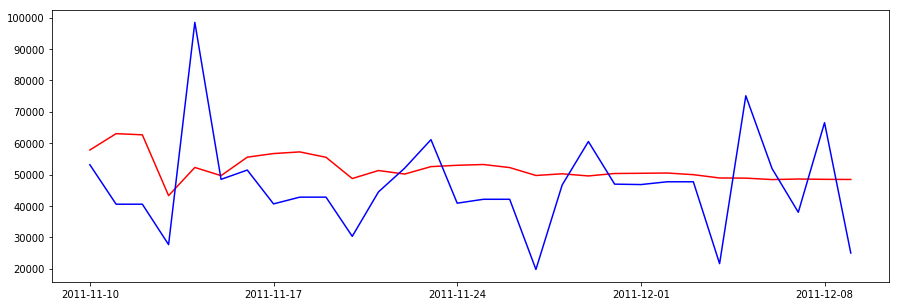

In [604]:
plt.figure(figsize=(15,5))
plt.plot(predicted_df.index, predicted_df[kpi_to_forecast], 'r')
plt.plot(df_test["Date"], df_test[kpi_to_forecast], 'b');

# Prophet

In [605]:
ts_df.head()

,Date,Total_value_paid,Quantity,CustomerID
0,2010-12-01,51704.62,22931.0,89.0
1,2010-12-02,44095.93,24470.0,95.0
2,2010-12-03,39547.21,11804.0,37.0
3,2010-12-04,39547.21,11804.0,37.0
4,2010-12-05,25738.00,12940.0,69.0


In [606]:
# ds - data column
# y - kpti to forecast

In [608]:
working_data = ts_df[:-30][["Date", kpi_to_forecast]]

In [609]:
working_data.head()

,Date,Total_value_paid
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-04,39547.21
4,2010-12-05,25738.00


In [611]:
working_data.columns = ["ds", "y"]

In [612]:
working_data.head()

,ds,y
0,2010-12-01,51704.62
1,2010-12-02,44095.93
2,2010-12-03,39547.21
3,2010-12-04,39547.21
4,2010-12-05,25738.00


In [619]:
model = Prophet(changepoint_prior_scale=0.05, 
                yearly_seasonality=True,
               weekly_seasonality=True,
               daily_seasonality=True)

In [620]:
model.fit(working_data)

In [622]:
future = model.make_future_dataframe(periods=30, freq='d')

In [623]:
future.head()

,ds
0,2010-12-01
1,2010-12-02
2,2010-12-03
3,2010-12-04
4,2010-12-05


In [624]:
forecast = model.predict(future)

In [625]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-12-01,45732.446493,45732.446493,45732.446493,42556.143148,60742.319033,5586.953309,5586.953309,5586.953309,-23794.423465,...,0.0,0.0,0.0,968.972621,968.972621,968.972621,28412.404152,28412.404152,28412.404152,51319.399802
1,2010-12-02,45752.603977,45752.603977,45752.603977,44551.960242,62872.201928,8041.776295,8041.776295,8041.776295,-23794.423465,...,0.0,0.0,0.0,4733.803100,4733.803100,4733.803100,27102.396659,27102.396659,27102.396659,53794.380271
2,2010-12-03,45772.761460,45772.761460,45772.761460,38147.707943,57514.542791,1651.915695,1651.915695,1651.915695,-23794.423465,...,0.0,0.0,0.0,-236.560554,-236.560554,-236.560554,25682.899713,25682.899713,25682.899713,47424.677155
3,2010-12-04,45792.918944,45792.918944,45792.918944,36487.985467,55338.771039,130.815393,130.815393,130.815393,-23794.423465,...,0.0,0.0,0.0,-237.381038,-237.381038,-237.381038,24162.619895,24162.619895,24162.619895,45923.734336
4,2010-12-05,45813.076427,45813.076427,45813.076427,24800.127753,43543.948666,-11292.579935,-11292.579935,-11292.579935,-23794.423465,...,0.0,0.0,0.0,-10049.473792,-10049.473792,-10049.473792,22551.317322,22551.317322,22551.317322,34520.496492


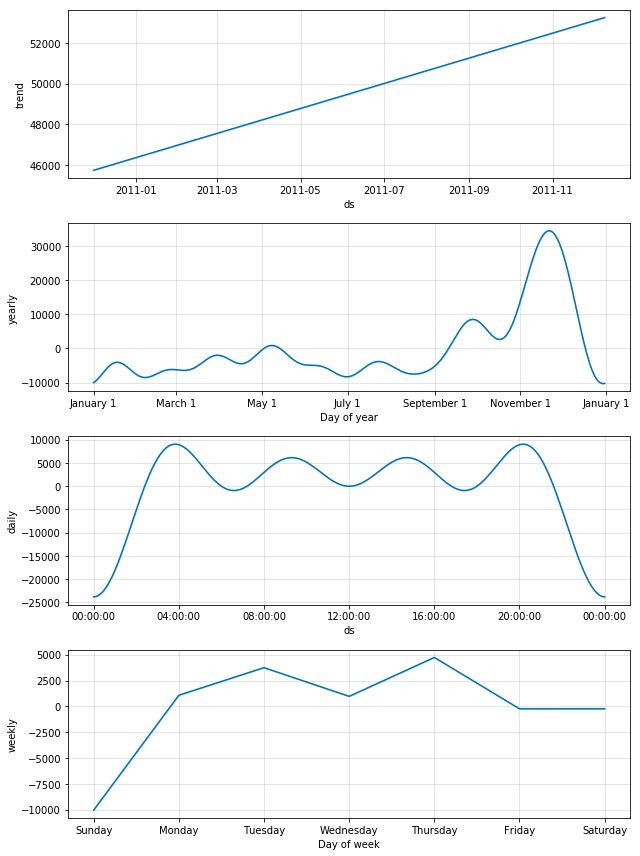

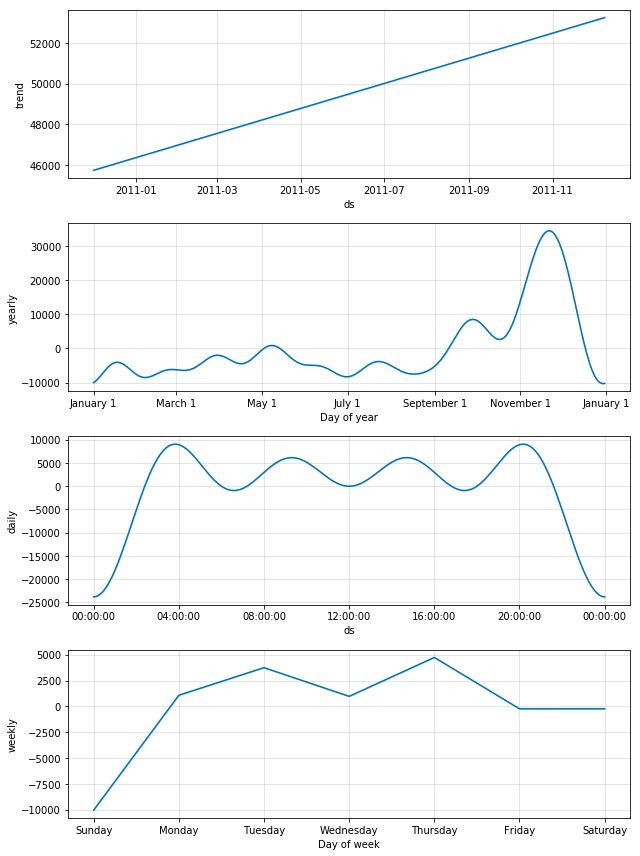

In [630]:
model.plot_components(forecast)

In [639]:
predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

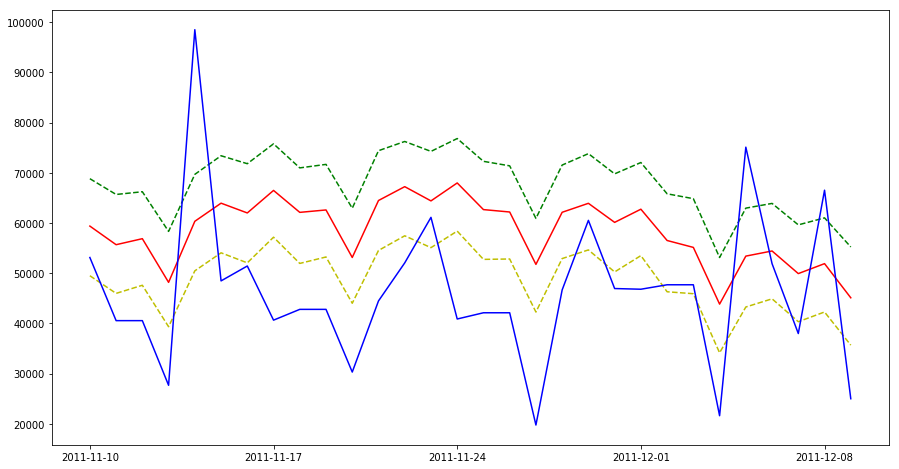

In [641]:
plt.figure(figsize=(15,8))
plt.plot(predictions.ds, predictions.yhat, 'r');
plt.plot(predictions.ds, predictions.yhat_lower, '--y');
plt.plot(predictions.ds, predictions.yhat_upper, '--g');
plt.plot(df_test.Date, df_test[kpi_to_forecast], "b");

In [642]:
0

0